If a company wants to start a movie studio which questions should they answer to make the highest profit movie thay can.This notebook has the codes which are used to explore and analize the data to answer the following questions.

1) Movie genres: What are the movie genres that make the most money?

2) Hiring the right people: How to hire a film crew to make the highest grossing movies?

3) Budget: What is the budget of the top performing movies?

4) Release: At what time of the year should the movie be released?

In [1]:
%autosave 10
# Autosaving every ten seconds.

Autosaving every 10 seconds


## Import libraries

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
# Print all the interactive output without resorting to print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Hide the warning boxes
import warnings
warnings.filterwarnings('ignore')

## Set options

In [5]:
## Display more information 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


## Read datasets

In [6]:
## Instantiate data frame from data 
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_df = pd.read_csv('zippedData/movies.csv')

## EDA for all datasets
 There are 11 datasets given in the project and 2 datasets from the web. Exploratory data analysis was done in all data sets to gain a certain amount of familiarity with the data, before one starts to extract insights from it.There is enormous missing data in most of the data sets. The datasets found from the web has less missing data.

### Display the first 5 rows of data frames

 According to the columns and first five rows;
 
 The 'genres' column of movies_df can be used to find the right story/type for the high revenue movie. But it is necassary to seperate the genres to find each genres count. 
 
 
 In movie_gross_df domestic and foreing gross are given but it is necessary to make a column for worldwide gross. Production budget is needed to find the net profit of each movie. 
 
 
  In movie_budgets_df, worldwide gross and production budget are given, profit can be calculated and some conclusions can be made by using release date of the movies.
  
  
  In all datasets the year of the movie should be checked to catch the trends. In 90s romantic comedies were very popular but these days hero, fantasy and action movies attract people to the theatres. Budget can also be a problem because the inflation rates also has to be considered to inspect the success of a movie. Data  from the movies after 2010 (or at least 2000) should be used to the datasets contain enough data.
  
  

In [7]:
movies_df.head()

,tconst,primaryTitle,startYear,genres
0,tt0000009,Miss Jerry,1894,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
2,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
3,tt0000502,Bohemios,1905,\N
4,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"


In [8]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Check shapes and info 

 Datasets are big enough to make right conclusions. They do not have too many missing values except the 'foreign_gross' column in movie_gross_df. To avoid from loosing data foreign gross and domestic gross can be studied seperately.
 
 It is necessary to change the string data type to float or integer to be able to add budgets and find profits.
 
 these datasets can be processed in many ways if there are not too many missing values. ??????
 
 





In [10]:
## Check shapes ##    
print(f'Shape of movie_gross_df is {movie_gross_df.shape}')
print(f'Shape of movie_budgets_df is {movie_budgets_df.shape}')
print(f'Shape of movies_df is {movies_df.shape}')


Shape of movie_gross_df is (3387, 5)
Shape of movie_budgets_df is (5782, 6)
Shape of movies_df is (545821, 4)


In [11]:
## Check info ##
print('----------------movie_gross_df--------------------')
movie_gross_df.info()
print('----------------movie_budgets_df--------------------')
movie_budgets_df.info()
print('----------------movies_df--------------------')
movies_df.info()

----------------movie_gross_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
----------------movie_budgets_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
----------------movies_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545821 entries, 0 to 54582

### Check invalid values


In [12]:
## Check invalid (nan) values ##
movies_df.isna().sum()
movie_gross_df.isna().sum()
movie_budgets_df.isna().sum()

tconst          0
primaryTitle    0
startYear       0
genres          0
dtype: int64

title             0   
studio            5   
domestic_gross    28  
foreign_gross     1350
year              0   
dtype: int64

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data cleaning for movie_gross_df

After EDA it is explored that foreign_gross column has too many missing values. To keep the data as much as possible the dataframe is processed by seperating it into two dataframes. 

In [13]:
# Define two dataframes from movie_gross_df
domestic_gross_df = movie_gross_df.dropna(subset=['studio', 'domestic_gross'])
total_gross_df = movie_gross_df.dropna()

In [14]:
# Replace , . $ from the string to change type to integer.
total_gross_df['foreign_gross'] = total_gross_df['foreign_gross'].apply(
    lambda x: x.replace(',', ''))
total_gross_df['foreign_gross'] = total_gross_df['foreign_gross'].apply(
    lambda x: x.replace('.', ''))

In [15]:
# Change the type from string to float.
total_gross_df['foreign_gross'] = total_gross_df['foreign_gross'].astype(float)

In [16]:
# Make a new column with two columns of the data frame.
sum_column = total_gross_df['foreign_gross'] + total_gross_df['domestic_gross']
total_gross_df["total_gross"] = sum_column

In [17]:
# Sort the values of the new column in descending order.
total_gross_df = total_gross_df.sort_values(by='total_gross', ascending=False)

In [18]:
total_gross_df = total_gross_df [:1000]

In [19]:
studios=total_gross_df['studio'].value_counts().head(30).index
total_gross_df_filtered=total_gross_df[ total_gross_df['studio'].isin(studios)]

## Plot the high profit studios


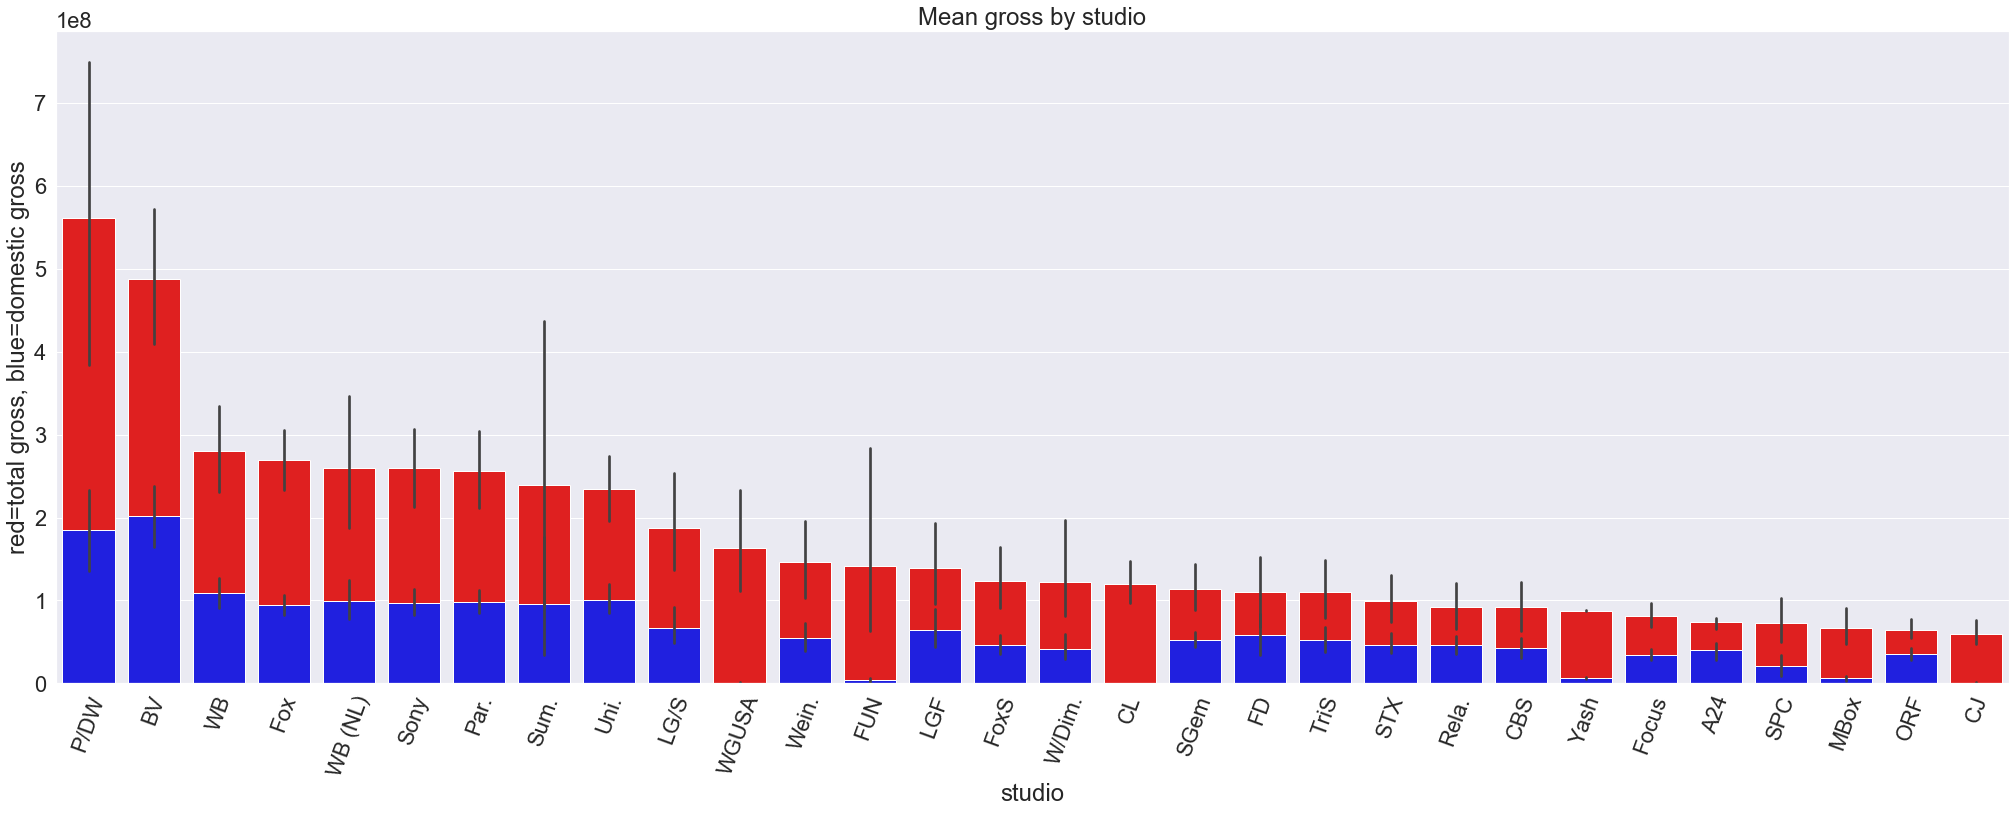

In [20]:
# Bar graph of high profit studios (domestic gross + foreign gross)
# Set font scale and figsize
sns.set(rc={'figure.figsize': (35, 12)}, font_scale=2)
orde=total_gross_df_filtered.groupby(["studio"])["total_gross"].aggregate(np.mean).reset_index().sort_values("total_gross", ascending = False)
b=sns.barplot(x='studio', y="total_gross", data=total_gross_df_filtered,color = "red",
              order = orde['studio'])
a=sns.barplot(x='studio', y="domestic_gross",data=total_gross_df_filtered,color = "blue",order = orde['studio'])
for item in a.get_xticklabels():     ## Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title('Mean gross by studio');
plt.ylabel('red=total gross, blue=domestic gross');
plt.axhline(linewidth=1, color='r');
# plt.legend


In [21]:
orde.head(9)

,studio,total_gross
14,P/DW,5.616000e+08
1,BV,4.872368e+08
25,WB,2.802593e+08
8,Fox,2.694583e+08
26,WB (NL),2.596513e+08
20,Sony,2.593022e+08
15,Par.,2.565662e+08
21,Sum.,2.388111e+08
23,Uni.,2.342667e+08


### Conclusion 1 Which film crew ???

The high profit studios are  Dreamworks, Buena Vista(Disney), Warner Bros, Fox, Sony, Paramount, Universal. It is necessary to hire the film crew who worked in these studios. 

What about Summit entertainment? It has a very high variance. It is very risky to work with the people from these studios. Summit entertainment is the producer of Twilight series. Twilight movies are incresasing the total gross of the studio but they have very unpopular movies too.



## Data cleaning for movies_df

In [22]:
studios=total_gross_df['studio'].value_counts().head(30)

In [23]:
# Movies data frame does not contain null values.
movies_df['tconst'].isna().sum()
movies_df['primaryTitle'].isna().sum()
movies_df['startYear'].isna().sum()
movies_df['genres'].isna().sum()

0

0

0

0

In [24]:
movies_df = movies_df.drop_duplicates(
   'tconst', keep='first')  # Drop duplicates

In [25]:
type(movies_df)

pandas.core.frame.DataFrame

In [26]:
# find raws which have '\N' and change the into 'nan' in 'genres' column
movies_df.genres.replace('\\N', float('nan'), inplace=True)

In [27]:
type(movies_df)

pandas.core.frame.DataFrame

In [28]:
# drop 'nan' values in 'genres' column
movies_df.genres=movies_df.genres.dropna()

In [29]:
type(movies_df)

pandas.core.frame.DataFrame

## Data cleaning for movie_budgets_df

In [30]:
movie_budgets_df.isna().sum()
## There is no need to drop columns.

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [31]:
movie_budgets_df = movie_budgets_df.drop_duplicates(
    subset=["release_date", "movie"], keep="first")    # Drop duplicates

### Merging two dataframes

In [32]:
# Change column names to prepare merge.
movies_df = movies_df.rename(columns={'primaryTitle': 'movie'})

In [33]:
# Merge two data frames on movie column.
movie_budgets_df = pd.merge(
    movie_budgets_df, movies_df, how='inner', on='movie')

### Exploding genres column 

The genres of a movie can not be expressed in only one word. In many movies genres is given with three or four words. For example the genre of Avatar(2009) is Action, Adventure and Fantasy. The genres column includes almost all the combinations of many genres. There are around 200 unique values in genres column. It is necessary to seperate them into single words to count the frequency and profits of the movies.

In [34]:
# Seperate the genres column to many columns to plot categorically.
movie_budgets_df["genres"] = movie_budgets_df["genres"].str.split(",", 3)

In [35]:
# Making new columns with all elements of genres column.
movie_budgets_df = movie_budgets_df.explode('genres')

### More cleaning and preparing

In [36]:
# Reset the index and dropping the previous index column
movie_budgets_df = movie_budgets_df.reset_index()
movie_budgets_df = movie_budgets_df.drop(columns=['index'])

In [37]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace('.', ''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace('$', ''))

In [38]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace('.', ''))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace('$', ''))

In [39]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace('.', ''))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace('$', ''))

In [40]:
# Change the type from string to integer.
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(
    int)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(
    int)
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(
    int)

In [41]:
# Make a new column with two columns of the data frame.
profit = movie_budgets_df['worldwide_gross'] + movie_budgets_df['production_budget']
movie_budgets_df["profit"] = profit

In [45]:
movie_budgets_df=movie_budgets_df.sort_values(by='profit',ascending = False)

In [46]:
# Get the release year column by slicing release date column
movie_budgets_df['release_year'] = [a[7:12]
                                     for a in movie_budgets_df['release_date']]

In [47]:
# Get the movies produced after 2010
movie_budgets_df = movie_budgets_df[movie_budgets_df['release_year'] >= '2010']

In [48]:
# Sort the values of worldwide gross column in descending order.
movie_budgets_df = movie_budgets_df.sort_values(
    by='profit', ascending=False)

## Plot the genres of movies



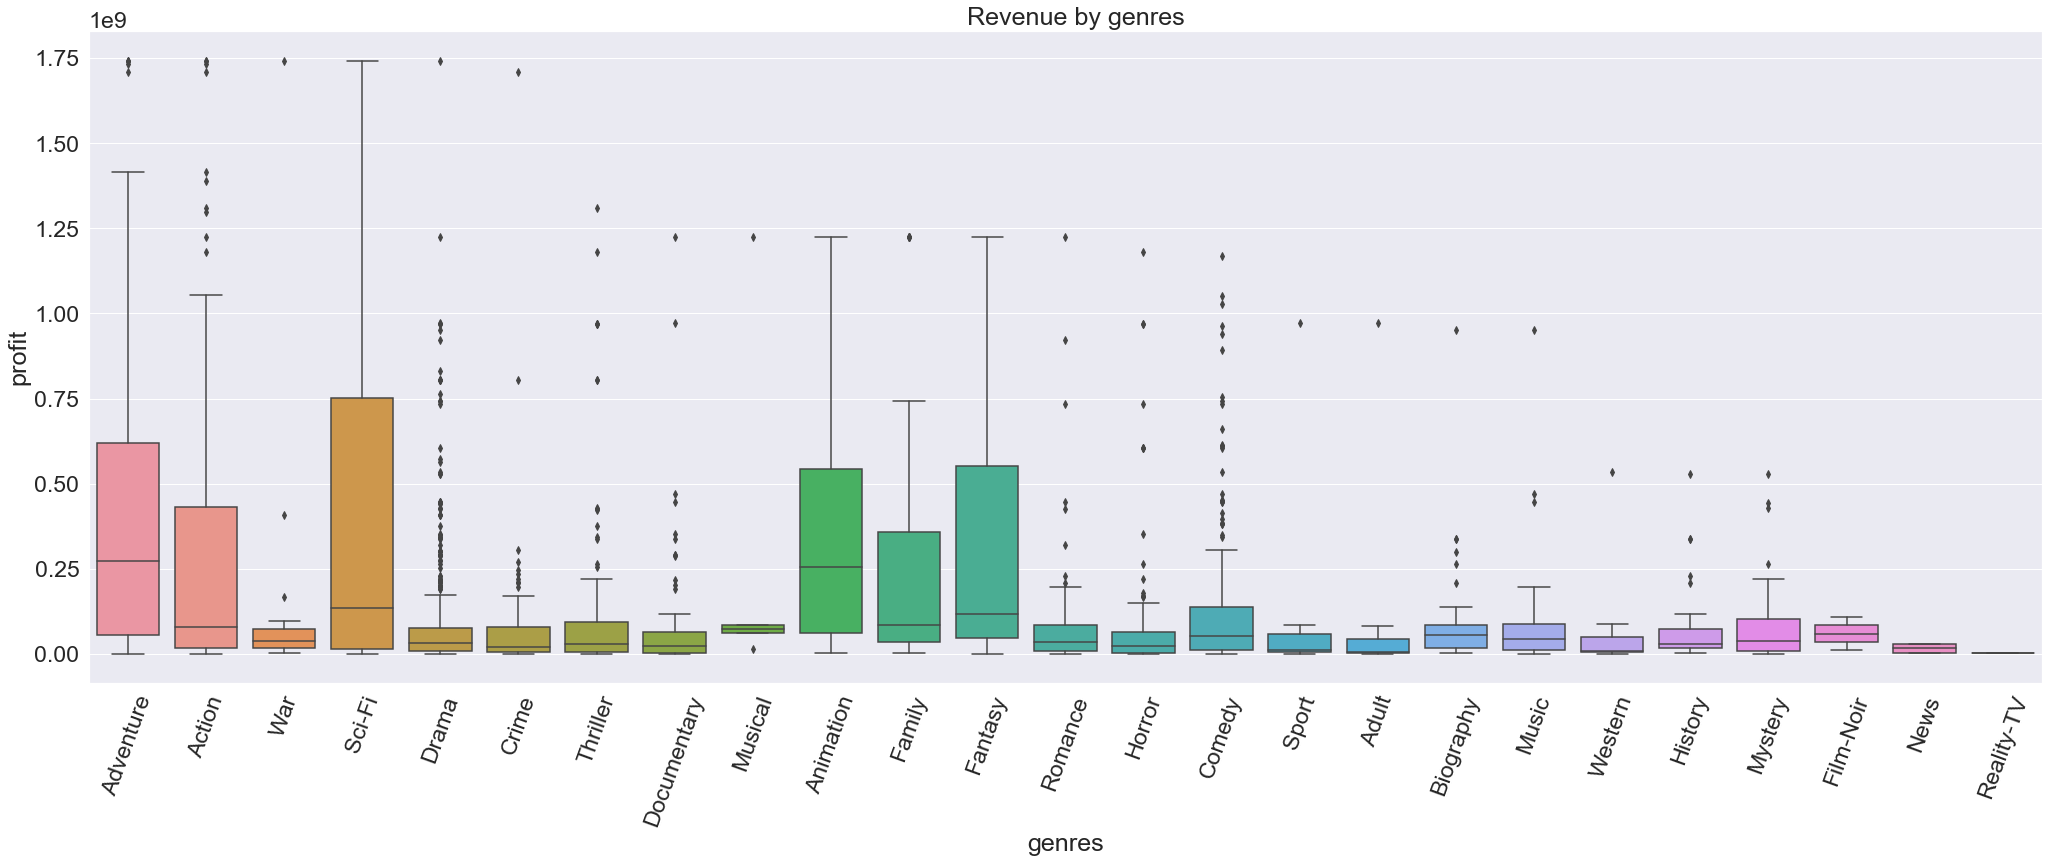

In [49]:
sns.set(rc={'figure.figsize': (35, 12)},font_scale=2.1)  # Set font scale   
g = sns.boxplot(x="genres", y="profit", data=movie_budgets_df)
for item in g.get_xticklabels():  # Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title('   Revenue by genres');

### Conclusion 2: What genre ???

According to the graph Adventure, Science-Fiction, Action, Fantasy, Family movies make the best profit. There are too big outliers in War, Musical and Adult movies, it means even if there are some successful movies in these genres it is risky to investigate these type of movies.

Animation movies are usually considered as a genres but animations are a method of movie making. Animations also have genres, too. However,  animations are usually making high profit because they are family movies.



## Data cleaning and preparing

In [50]:
# Get the original dataset again to use in another plot
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [51]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.strip('$'))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.strip('$'))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.strip('$'))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace(',', ''))

In [52]:
# Change the type from string to float.
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(
    float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(
    float)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(
    float)

In [53]:
# Get the release month from the release by slicing.
movie_budgets_df['release_month'] = [a[0:3]
                                     for a in movie_budgets_df['release_date']]

## Plot the budget and gross

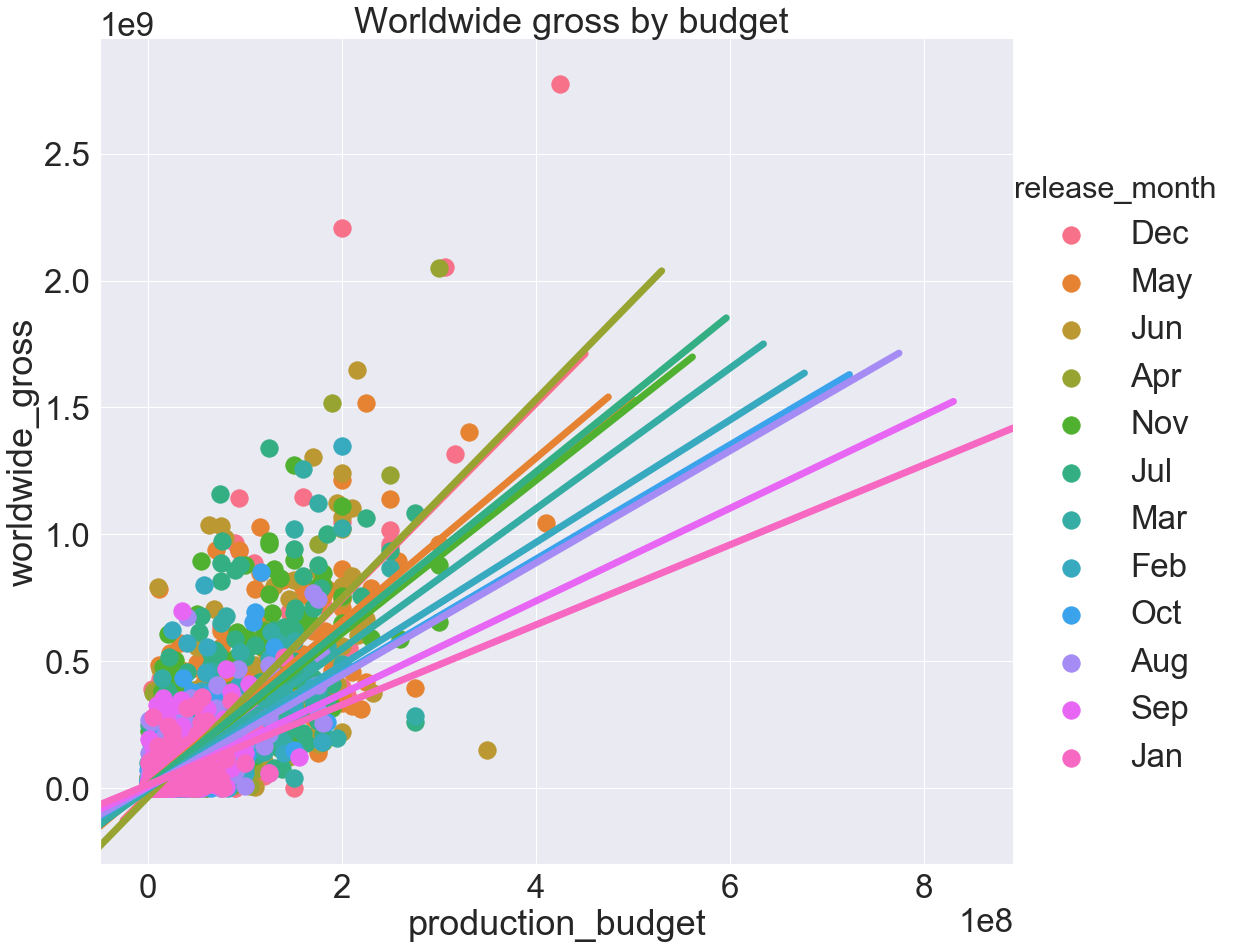

In [54]:
sns.set(font_scale=3)  # Set font scale
sns.lmplot(x="production_budget", y="worldwide_gross", hue='release_month',ci= None,
           data=movie_budgets_df, height=14, aspect=1.1, scatter_kws={'alpha': 1, "s": 300}, line_kws={'lw': 7})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])  # set the x- and y-limits of plot.
plt.title('   Worldwide gross by budget');

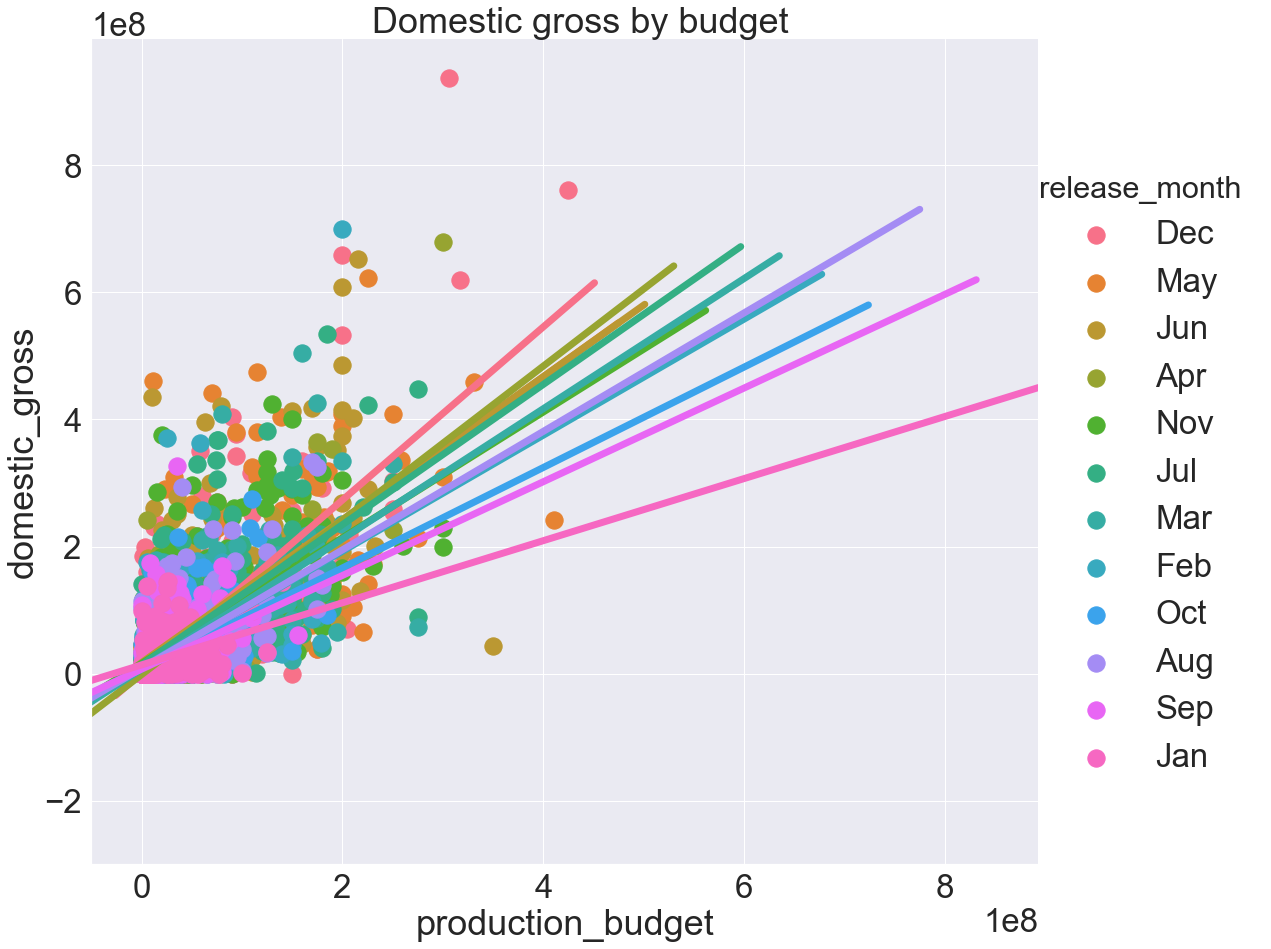

In [55]:
sns.set(font_scale=3)  # Set font scale
sns.lmplot(x="production_budget", y="domestic_gross", hue='release_month',ci= None,
           data=movie_budgets_df, height=14, aspect=1.1, scatter_kws={'alpha': 1, "s": 300}, line_kws={'lw': 7})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])  # set the x- and y-limits of plot.
plt.title('   Domestic gross by budget');

### Conclusion 3 How much budget ???

According to the graph high gross movies have high budgets. To gain more, spend more. A budget at around 200 million is going to make a good revenue.

### Conclusion 4 Which month ???
According to the graph the best 3 months to release a movie in US are December, June, May and November. 
Best moths to release a movie in the world are June and December. But is it necessary to get more information about the seasons, holidays and some other factors affecting the movie customers. 